In [77]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [78]:
tf = 60
tspan = np.arange(0, tf, 0.1)
init = [1.5, 3]
distortion = [0.04, -0.04]
dist_init = [init[0] + distortion[0], init[1] + distortion[1]]

a, b = 2, 4.9

In [79]:
def pend_test(vect, t, a, b):
    x, y = vect
    dvectdt = [a + x**2 * y - (b + 1)*x, b * x - x**2 * y]
    
    return dvectdt

In [80]:
sol = odeint(pend_test, init, tspan, args=(a, b))
soldist = odeint(pend_test, dist_init, tspan, args=(a, b))

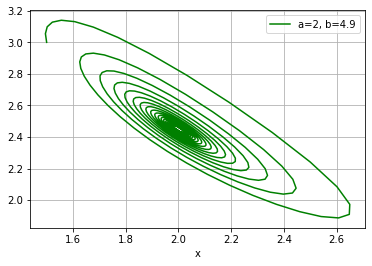

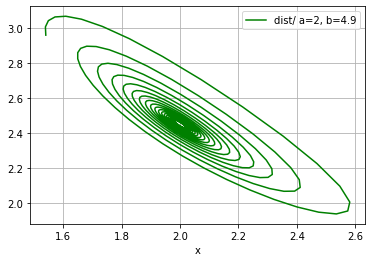

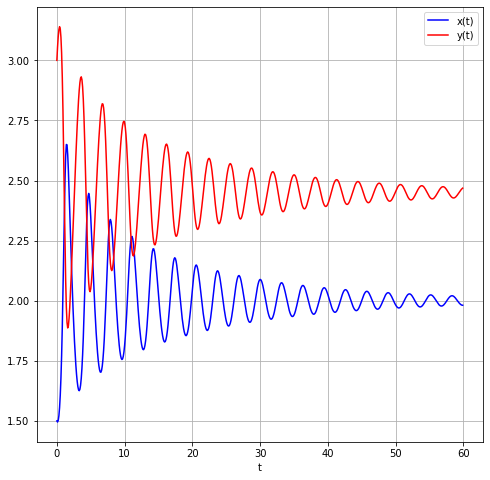

In [81]:
plt.plot(sol[:, 0], sol[:, 1], 'g', label = 'a='+str(a)+', b='+str(b))
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

plt.plot(soldist[:, 0], soldist[:, 1], 'g', label = 'dist/ a='+str(a)+', b='+str(b))
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.plot(tspan, sol[:, 0], 'b', label='x(t)')
plt.plot(tspan, sol[:, 1], 'r', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [82]:
a = 2

b = [2, 3.5, 4, 4.9, 5, 5.1, 5.5]
sol = [0 for i in range(len(b))]
soldist = sol

#dxdt = y
#dydt = eps*(1-x**2)*y - x
for i in range(len(b)):
    temp = b[i]

    def pend(vect, t, a, b):
        x, y = vect
        dvectdt = [a + x**2 * y - (temp + 1)*x, temp * x - x**2 * y]
        #dvectdt = [eps*(x - 1/3*x**3 - y), 1/eps * x]
        return dvectdt

    sol[i] = odeint(pend, init, tspan, args=(a, temp))
    soldist[i] = odeint(pend, dist_init, tspan, args=(a, temp))


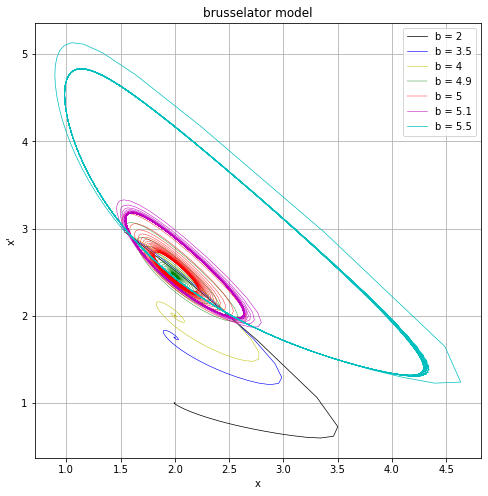

In [84]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.plot(sol[0][:, 0], sol[0][:, 1], 'k', linewidth = 0.7, label='b = ' + str(b[0]))
plt.plot(sol[1][:, 0], sol[1][:, 1], 'b', linewidth = 0.6, label='b = ' + str(b[1]))
plt.plot(sol[2][:, 0], sol[2][:, 1], 'y', linewidth = 0.5, label='b = ' + str(b[2]))
plt.plot(sol[3][:, 0], sol[3][:, 1], 'g', linewidth = 0.4, label='b = ' + str(b[3]))
plt.plot(sol[4][:, 0], sol[4][:, 1], 'r', linewidth = 0.4, label='b = ' + str(b[4]))
plt.plot(sol[5][:, 0], sol[5][:, 1], 'm', linewidth = 0.5, label='b = ' + str(b[5]))
plt.plot(sol[6][:, 0], sol[6][:, 1], 'c', linewidth = 0.7, label='b = ' + str(b[6]))
plt.title("Brusselator model")
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('x\'')
plt.grid()
plt.show()

#plt.plot(soldist[i][:, 0], soldist[i][:, 1], 'g', label='dist/ eps = ' + str(eps[i]))
#plt.legend(loc='best')
#plt.xlabel('x')
#plt.ylabel('x\'')
#plt.grid()
#plt.show()

#plt.plot(tspan, sol[:, 0], 'b', label='x(t)')
#plt.plot(tspan, sol[:, 1], 'g', label='y(t)')
#plt.legend(loc='best')
#plt.xlabel('t')
#plt.grid()
#plt.show()